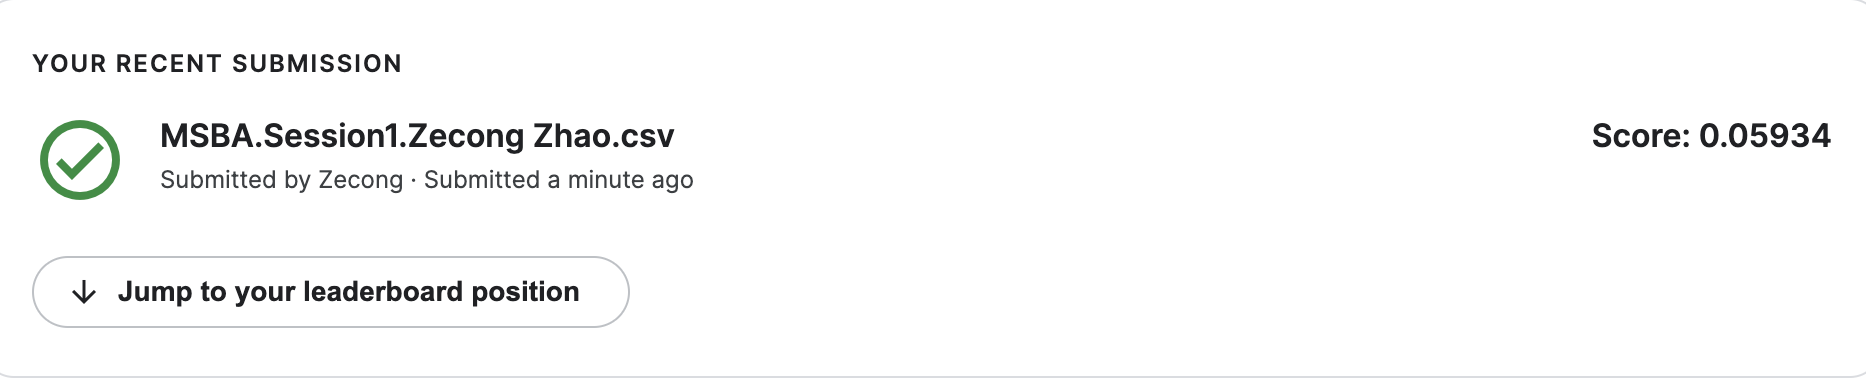

## Code Part

In [3]:
import pandas as pd 
import numpy as np 
import zipfile
import os, shutil
#import cv2
import skimage

## Data Preprocessing

### Import Image

In [4]:
cd /Users/zhaocong/Desktop/MSBA6420_Predictive_Analytics/Homework4

/Users/zhaocong/Desktop/MSBA6420_Predictive_Analytics/Homework4


In [7]:
train_zip = 'dogs-vs-cats-redux-kernels-edition/train.zip'
test_zip = 'dogs-vs-cats-redux-kernels-edition/test.zip'
zip_train = zipfile.ZipFile(train_zip,'r')
zip_test = zipfile.ZipFile(test_zip,'r')
zip_train.extractall('dogs-vs-cats-redux-kernels-edition/')
zip_test.extractall('dogs-vs-cats-redux-kernels-edition/')

In [4]:
train_path = '/Users/zhaocong/Desktop/MSBA6420_Predictive_Analytics/Homework4/dogs-vs-cats-redux-kernels-edition/train/'
test_path = '/Users/zhaocong/Desktop/MSBA6420_Predictive_Analytics/Homework4/dogs-vs-cats-redux-kernels-edition/test/'

In [10]:
os.listdir(train_path)[0:10]

['dog.8011.jpg',
 'cat.5077.jpg',
 'dog.7322.jpg',
 'cat.2718.jpg',
 'cat.10151.jpg',
 'cat.3406.jpg',
 'dog.1753.jpg',
 'cat.4369.jpg',
 'cat.7660.jpg',
 'dog.5535.jpg']

In [11]:
os.listdir(test_path)[0:10]

['9733.jpg',
 '63.jpg',
 '6400.jpg',
 '823.jpg',
 '4217.jpg',
 '3578.jpg',
 '10321.jpg',
 '2666.jpg',
 '5109.jpg',
 '11981.jpg']

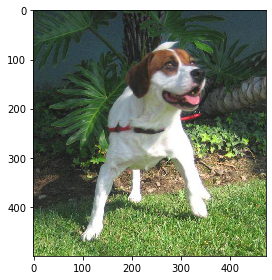

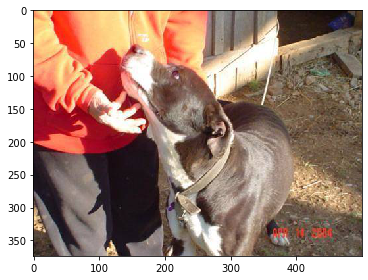

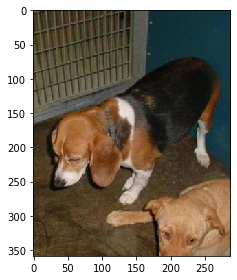

In [16]:
random_i = np.random.randint(1,25000,size=3)

for i in random_i:
    img = io.imread(os.path.join(train_path,os.listdir(train_path)[i]))
    skimage.io.imshow(img)
    skimage.io.show()

* Reference: How to read image in Python? https://blog.csdn.net/fengdu78/article/details/109541917
* Reference: How to Load and Manipulate Images for Deep Learning in Python With PIL/Pillow https://machinelearningmastery.com/how-to-load-and-manipulate-images-for-deep-learning-in-python-with-pil-pillow/

### Extract Training Label

In [9]:
train_list = os.listdir(train_path)

In [10]:
#train_list = os.listdir(train_path)
#train_label = []
#for i in train_list:
#    if i.split('.')[0] == 'dog':
#        train_label.append(1)
#    else:
#        train_label.append(0)

### Creat Directory

In [15]:
cd /Users/zhaocong/Desktop/MSBA6420_Predictive_Analytics/Homework4/dogs-vs-cats-redux-kernels-edition/train

/Users/zhaocong/Desktop/MSBA6420_Predictive_Analytics/Homework4/dogs-vs-cats-redux-kernels-edition/train


In [24]:
mkdir cat dog   

In [25]:
# put cat or dog into corresponding folder separately
for p in train_list:
    if p.split('.')[0] == 'cat':
        shutil.move(p, 'cat')

for p in train_list:
    if p.split('.')[0] == 'dog':
        shutil.move(p, 'dog')

In [73]:
cd /Users/zhaocong/Desktop/MSBA6420_Predictive_Analytics/Homework4/dogs-vs-cats-redux-kernels-edition/test/

/Users/zhaocong/Desktop/MSBA6420_Predictive_Analytics/Homework4/dogs-vs-cats-redux-kernels-edition/test


In [76]:
test_list = os.listdir(test_path)

In [79]:
mkdir data

In [80]:
for p in test_list:
    shutil.move(p, 'data')

### ImageDataGenerator

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_datagen = ImageDataGenerator(
        rescale=1/255, # rescale value into [0,1]
        validation_split=0.20)

train_generator=train_datagen.flow_from_directory(
    train_path,
    target_size=(300,300), # rescale image size into 300*300
    batch_size=32,
    subset = 'training',
    class_mode='binary')

valid_generator=train_datagen.flow_from_directory(
    train_path,
    target_size=(300,300),
    batch_size=32,
    subset = 'validation',
    class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [89]:
test_datagen = ImageDataGenerator(
        rescale=1/255)

test_generator=test_datagen.flow_from_directory(
    test_path,
    target_size=(300,300), # rescale image size into 300*300
    batch_size=50, # make sure to be divisible by test data size
    color_mode="rgb",
    class_mode='binary',
    shuffle=False,   # make sure the order of test data is not shuffled, or could have mismatch problem when predicting
    seed=123)

Found 12500 images belonging to 1 classes.


In [29]:
print(train_generator.class_indices)

{'cat': 0, 'dog': 1}


In [30]:
train_generator[0][0].shape   # each bach has 32 images and each image is 300 * 300 with 3 (RGB)

(32, 300, 300, 3)

In [99]:
train_generator[0][1]   # corresponding label

array([0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1.],
      dtype=float32)

In [100]:
train_generator[1][1]

array([0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1.,
       1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0.],
      dtype=float32)

* Reference: Tutorial on using Keras flow_from_directory and generators
https://vijayabhaskar96.medium.com/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720
* Reference: Keras split train test set when using ImageDataGenerator https://stackoverflow.com/questions/42443936/keras-split-train-test-set-when-using-imagedatagenerator
* Reference: ImageDataGenerator https://zhuanlan.zhihu.com/p/139484800
* Reference: as flow_from_directory returns 0 images https://datascience.stackexchange.com/questions/51671/keras-flow-from-directory-returns-0-images

## Build Model

In [8]:
base_model = keras.applications.xception.Xception(weights="imagenet",
                                                  include_top=False)
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(2, activation="softmax")(avg)
model = keras.models.Model(inputs=base_model.input, outputs=output)

2022-03-25 18:50:05.716478: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-25 18:50:05.717429: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [9]:
# just train output layer

batch_size = 32
dataset_size = 25000

for layer in base_model.layers:
    layer.trainable = False

optimizer = keras.optimizers.SGD(learning_rate=0.2, momentum=0.9, decay=0.01)
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam',
              metrics=["accuracy"])

history = model.fit(train_generator,
                    steps_per_epoch=int(0.8 * dataset_size / batch_size), 
                    validation_data=valid_generator,
                    validation_steps=int(0.2 * dataset_size / batch_size),
                    epochs=1)
# Traditionally, the steps per epoch is calculated as train_length // batch_size

2022-03-25 18:50:25.533428: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 123 of 625
2022-03-25 18:50:35.481588: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 227 of 625
2022-03-25 18:50:45.507885: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 324 of 625
2022-03-25 18:50:55.582068: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 402 of 625
2022-03-25 18:51:05.467785: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 471 of 625
2022-03-25 18:51:15.458232: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 569 of 625
2022-03-25 18:51:21.229666: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


Train for 625 steps, validate for 156 steps


2022-03-25 18:51:34.848698: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 91 of 625
2022-03-25 18:51:44.810848: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 187 of 625
2022-03-25 18:51:54.751856: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 282 of 625
2022-03-25 18:52:04.777155: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 393 of 625
2022-03-25 18:52:14.759714: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 490 of 625
2022-03-25 18:52:24.796868: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 573 of 625
2022-03-25 18:52:29.388195: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


625/625 [==============================] - 16768s 27s/step - loss: 0.0812 - accuracy: 0.9754 - val_loss: 0.0708 - val_accuracy: 0.9800


In [ ]:
import keras

In [69]:
# train all parameters

for layer in base_model.layers:
    layer.trainable = True

optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9,
                                 nesterov=True, decay=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

history = model.fit(train_generator,
                    steps_per_epoch=int(0.8 * dataset_size / batch_size),
                    validation_data=valid_generator,
                    validation_steps=int(0.2 * dataset_size / batch_size),
                    epochs=3)

2022-03-26 01:35:39.998118: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 123 of 625
2022-03-26 01:35:50.007508: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 244 of 625
2022-03-26 01:35:59.998956: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 359 of 625
2022-03-26 01:36:09.993615: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 472 of 625
2022-03-26 01:36:20.045021: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 586 of 625
2022-03-26 01:36:23.422332: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


Train for 625 steps, validate for 156 steps
Epoch 1/3


2022-03-26 01:36:40.496487: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 144 of 625
2022-03-26 01:36:50.554184: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 275 of 625
2022-03-26 01:37:00.561988: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 361 of 625
2022-03-26 01:37:10.598395: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 469 of 625
2022-03-26 01:37:20.563377: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 579 of 625
2022-03-26 01:37:24.717029: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


625/625 [==============================] - 37813s 61s/step - loss: 0.0279 - accuracy: 0.9906 - val_loss: 0.0190 - val_accuracy: 0.9914
Epoch 2/3


2022-03-26 12:06:47.242442: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 135 of 625
2022-03-26 12:06:57.203834: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 273 of 625
2022-03-26 12:07:07.262255: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 405 of 625
2022-03-26 12:07:17.189569: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 513 of 625
2022-03-26 12:07:27.116526: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


625/625 [==============================] - 31447s 50s/step - loss: 0.0022 - accuracy: 0.9998 - val_loss: 0.0169 - val_accuracy: 0.9936
Epoch 3/3


2022-03-26 20:50:54.565232: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 132 of 625
2022-03-26 20:51:04.519330: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 266 of 625
2022-03-26 20:51:14.544197: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 389 of 625
2022-03-26 20:51:24.553338: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 503 of 625
2022-03-26 20:51:34.539357: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 614 of 625
2022-03-26 20:51:35.550577: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


625/625 [==============================] - 31416s 50s/step - loss: 7.8832e-04 - accuracy: 0.9999 - val_loss: 0.0162 - val_accuracy: 0.9934


In [70]:
# Save model
# serialize model to JSON
model_all_json = model.to_json()
with open("model_all.json", "w") as json_file:
    json_file.write(model_all_json)
# serialize weights to HDF5
model.save_weights("model_all.h5")

In [72]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

* Reference: What is the meaning of the "None" in model.summary of KERAS? https://stackoverflow.com/questions/47240348/what-is-the-meaning-of-the-none-in-model-summary-of-keras
* Reference: Having trouble understanding None in the summary of my Keras model https://datascience.stackexchange.com/questions/51829/having-trouble-understanding-none-in-the-summary-of-my-keras-model
* Reference: Choosing number of Steps per Epoch https://stackoverflow.com/questions/49922252/choosing-number-of-steps-per-epoch
* Reference: Meaning of batch_size，steps_per_epoch，epochs https://blog.csdn.net/continuing1234/article/details/118066639
* Reference: Transfer Learning https://blog.csdn.net/u010159842/article/details/79202107
* Reference: Machine Learning Tutorials https://studymachinelearning.com/keras-imagedatagenerator-with-flow_from_directory/
* Other Reference for future use: How use the model.predict_generator to predict the probabilities of multi-labels #9724 https://github.com/keras-team/keras/issues/9724
* Other Reference for future use: How use the keras model.predict_generator to predict the probabilities of multi-labels https://www.kaggle.com/questions-and-answers/52778

## Get Result

In [91]:
# predict 
#test_generator.reset() #make sure the order is matched
test_size = 12500
test_batch_size = 50
predict = model.predict_generator(test_generator,steps = 
                                   test_size/test_batch_size, verbose = 1)

250/250 [==============================] - 15727s 63s/step


In [107]:
filenames = test_generator.filenames

In [137]:
# get id 
id_list = []
for i in filenames:
    id_list.append(i.split('/')[1].split('.')[0])

In [138]:
result_test = pd.DataFrame({'id': id_list,'label': predict[:,1]})

In [141]:
result_test.to_csv('/Users/zhaocong/Desktop/MSBA6420_Predictive_Analytics/Homework4/MSBA.Session1.Zecong Zhao.csv', index=False)

In [142]:
pd.read_csv('/Users/zhaocong/Desktop/MSBA6420_Predictive_Analytics/Homework4/MSBA.Session1.Zecong Zhao.csv')

,id,label
0,1,0.999999
1,10,0.000003
2,100,0.000003
3,1000,0.999992
4,10000,0.999977
...,...,...
12495,9995,0.000060
12496,9996,0.999968
12497,9997,0.999985
12498,9998,0.000028


* Reference: How to use .predict_generator() on new Images - Keras
https://stackoverflow.com/questions/52270177/how-to-use-predict-generator-on-new-images-keras
* Reference: Output of model.predict_generator() https://stackoverflow.com/questions/64398579/output-of-model-predict-generator
* Reference: Why the return of predict and predict generator are different? #3477
https://github.com/keras-team/keras/issues/3477

## Save and Load Model

In [ ]:
# Save Model
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")

In [ ]:
# Load Model
import json
from keras.models import model_from_json

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = tf.keras.models.model_from_json(loaded_model_json)
#loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")

* Reference: [Solved] ValueError: Unknown initializer: GlorotUniform when using models.model_from_json(json) https://www.devzoneoriginal.com/2020/07/solved-valueerror-unknown-initializer.html

Benefits of ImageDataGenerator

* It can infer label names from the folder / directory name
* Image generator object can be used directly in the fit method for training and fit method will directly iterate through the batches of images during training and validation epochs
* It can augment your train and validation image data on the runtime of the model, and exposes different orientations of an image in space, rotation, hrozontal shifting, vertical shifting etc, so that we transform each image in a way that our model will hardly able to identify it as the same image being sent for training again and again